In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Fraud.csv")
df.shape

# Exploratory Data Analysis

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [15]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [16]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [18]:
# Check for null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

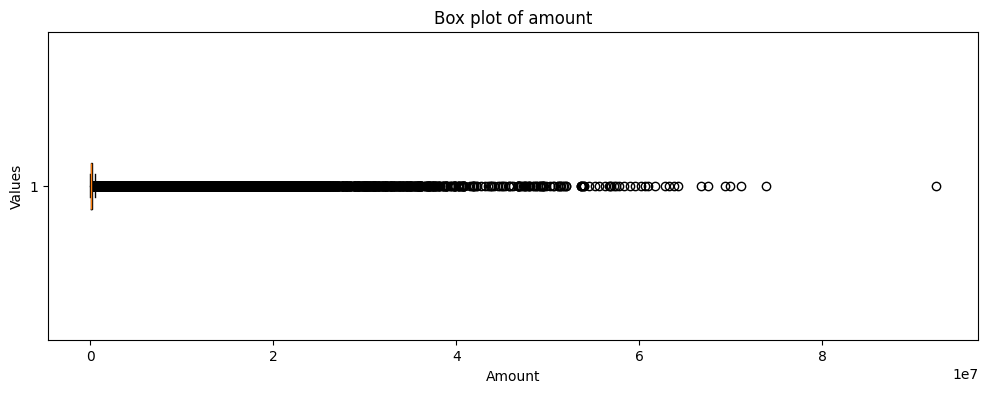

In [20]:
# Check for outliers
plt.figure(figsize=(12, 4))
plt.boxplot(df['amount'], vert=False)
plt.xlabel("Amount")
plt.ylabel("Values")
plt.title("Box plot of amount")
plt.show()

In [25]:
# Finding outliers using IQR method
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

lower_fence = Q1 - 1.5*IQR
upper_fence = Q3 + 1.5*IQR

outliers = df[(df["amount"] > upper_fence) | (df["amount"] < lower_fence)]
outliers

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [27]:
outliers.shape

(338078, 11)

In [28]:
count = len(outliers[outliers.isFraud == 1])
print("Count of fraud transactions in outliers: ", count)

Count of fraud transactions in outliers:  3854


In [30]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit/(fraud+legit))*100
fraud_percent = (fraud/(fraud+legit))*100

print(f"Number of legit transactions: {legit}")
print(f"Number of fraud transactions: {fraud}")
print(f"Percentage of legit transactions: {legit_percent}")
print(f"Percentage of fraud transactions: {fraud_percent}")

Number of legit transactions: 6354407
Number of fraud transactions: 8213
Percentage of legit transactions: 99.87091795518198
Percentage of fraud transactions: 0.12908204481801522


### Clearly this is an highly imbalanced dataset. Removing or averaging out outliers may make the model biased

# Visualization

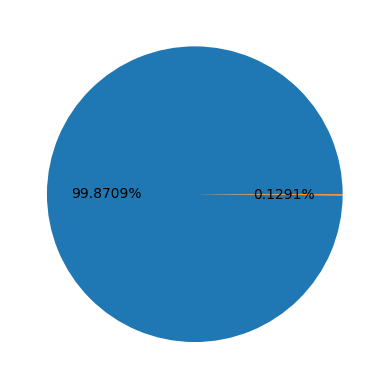

In [32]:
plt.pie(df["isFraud"].value_counts(), autopct="%.4f%%");

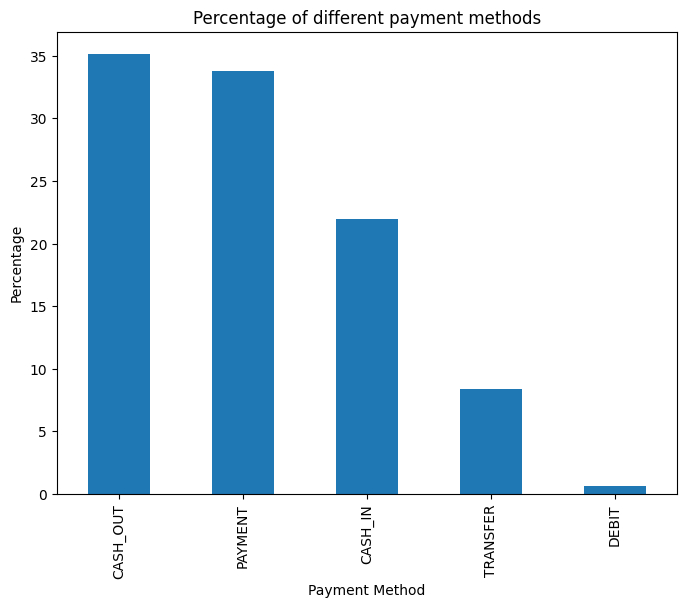

In [33]:
payment_counts = df["type"].value_counts()
payment_percentage = (payment_counts / payment_counts.sum())*100

plt.figure(figsize=(8, 6))
payment_percentage.plot(kind="bar")

plt.xlabel("Payment Method")
plt.ylabel("Percentage")
plt.title("Percentage of different payment methods");

type
CASH_OUT    50.11567
TRANSFER    49.88433
Name: count, dtype: float64


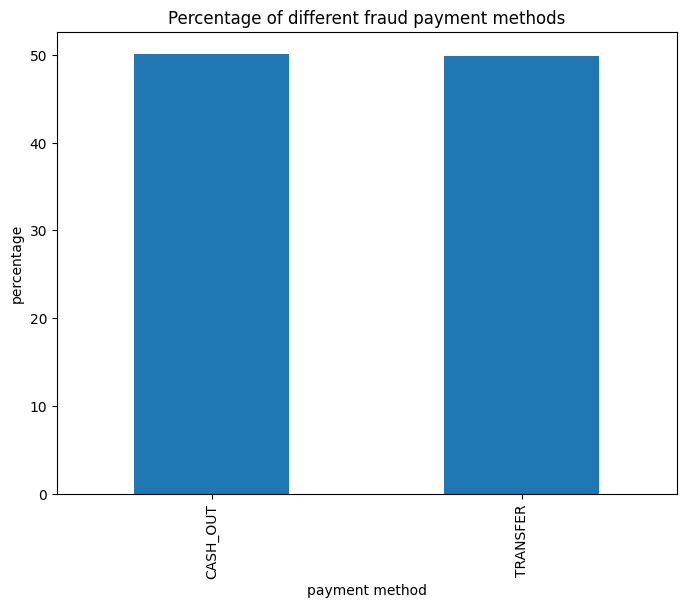

In [34]:
legit_df = df[df.isFraud == 0]
fraud_df = df[df.isFraud == 1]

payment_count_fraud = fraud_df['type'].value_counts()
payment_percentage_fraud = (payment_count_fraud/payment_count_fraud.sum())*100

print(payment_percentage_fraud)
plt.figure(figsize=(8, 6))
payment_percentage_fraud.plot(kind="bar")

plt.xlabel("payment method")
plt.ylabel("percentage")
plt.title("Percentage of different fraud payment methods");

## From the above plot, we can see only cash_out and transfer are the only payment method where fraud happens

# Feature Engineering

In [35]:
new_df = df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [36]:
objList = new_df.select_dtypes(include="object").columns
objList

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

## Label encoding objList

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for i in objList:
    new_df[i] = label_encoder.fit_transform(new_df[i].astype(str))

print(new_df.info())
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(6)
memory usage: 534.0 MB
None


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0
1,1,3,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0
2,1,4,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0
3,1,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0
4,1,3,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0


## dealing with Multicollinearity

<Axes: >

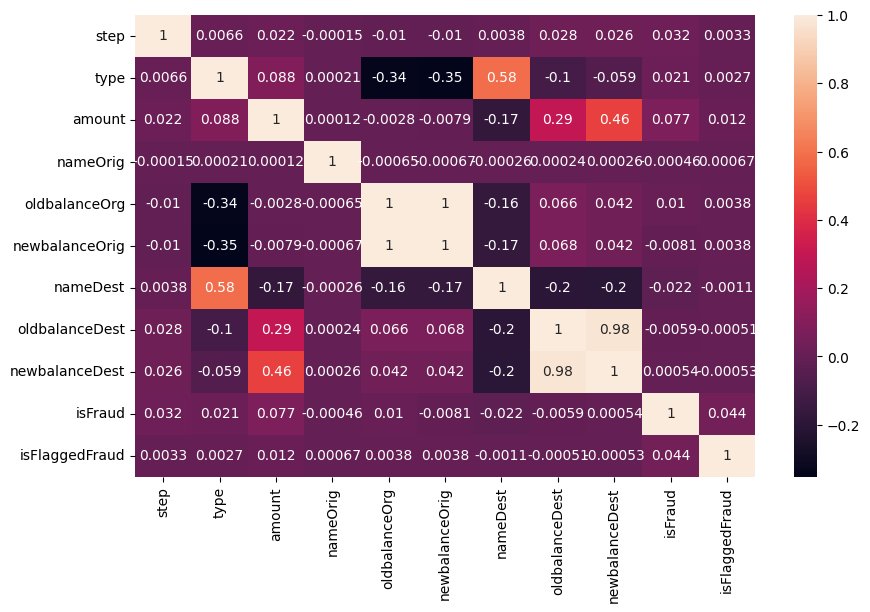

In [39]:
import seaborn as sns
corr = new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

### The relationship between predictors and target variable can become difficult to interpret because of multicollinearity. So we need to remove multicollinearity using VIF

In [42]:
# Calculating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return (vif)

calculate_vif(new_df)

,variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


In [43]:
new_df["amount_orig"] = new_df.apply(lambda x: x["oldbalanceOrg"] - x["newbalanceOrig"], axis=1)
new_df["amount_dest"] = new_df.apply(lambda x: x["newbalanceDest"] - x["oldbalanceDest"], axis=1)

new_df = new_df.drop(["oldbalanceOrg", "newbalanceOrig", "newbalanceDest", "oldbalanceDest", "nameOrig", "nameDest"], axis=1)

calculate_vif(new_df)

,variables,VIF
0,step,2.089916
1,type,2.039328
2,amount,3.883383
3,isFraud,1.187909
4,isFlaggedFraud,1.002535
5,amount_orig,1.293306
6,amount_dest,3.774030


<Axes: >

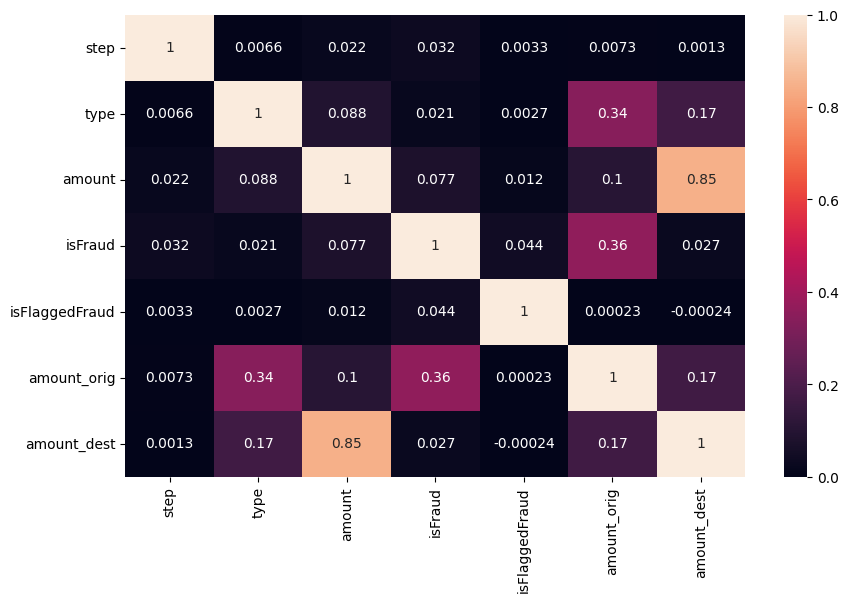

In [44]:
corr = new_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [45]:
new_df.head()

,step,type,amount,isFraud,isFlaggedFraud,amount_orig,amount_dest
0,1,3,9839.64,0,0,9839.64,0.0
1,1,3,1864.28,0,0,1864.28,0.0
2,1,4,181.00,1,0,181.00,0.0
3,1,1,181.00,1,0,181.00,-21182.0
4,1,3,11668.14,0,0,11668.14,0.0


# Model Building

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter

In [49]:
scaler = StandardScaler()

new_df["Normalized_Amount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df["Normalized_step"] = scaler.fit_transform(new_df["step"].values.reshape(-1, 1))
new_df["Normalized_type"] = scaler.fit_transform(new_df["type"].values.reshape(-1, 1))
new_df["Normalized_Account_orig"] = scaler.fit_transform(new_df["amount_orig"].values.reshape(-1, 1))
new_df["Normalized_Account_Dest"] = scaler.fit_transform(new_df["amount_dest"].values.reshape(-1, 1))
new_df.drop(["amount", "step", "type", "amount_orig", "amount_dest"], inplace= True, axis= 1)

new_df.head()

,isFraud,isFlaggedFraud,Normalized_Amount,Normalized_step,Normalized_type,Normalized_Account_orig,Normalized_Account_Dest
0,0,0,-0.281560,-1.703042,0.952399,0.211876,-0.152896
1,0,0,-0.294767,-1.703042,0.952399,0.157490,-0.152896
2,1,0,-0.297555,-1.703042,1.693076,0.146011,-0.152896
3,1,0,-0.297555,-1.703042,-0.528954,0.146011,-0.178952
4,0,0,-0.278532,-1.703042,0.952399,0.224345,-0.152896


# Train Test Split

In [50]:
X = new_df.drop(["isFraud"], axis=1)
y = new_df["isFraud"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5090096, 6)
Shape of X_test: (1272524, 6)


In [60]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_reg = LogisticRegression(C=0.001, penalty="l2")
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
logistic_regression_score = accuracy_score(y_test, y_pred)

In [61]:
# Decision tree
decision_tree = DecisionTreeClassifier(max_depth=80, min_samples_split=2, min_samples_leaf=1)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = accuracy_score(y_test, y_pred)

In [62]:
# Random forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest_score = accuracy_score(y_test, y_pred)

In [63]:
print(f"Logistic regression score: {logistic_regression_score*100}")
print(f"Decision tree score: {decision_tree_score*100}")
print(f"Random forest score: {random_forest_score*100}")

Logistic regression score: 99.96369420144532
Decision tree score: 99.96369420144532
Random forest score: 99.96369420144532


# Precision
### Out of total predicted positive results, how many are actual positive

# Recall
### Out of total actual positive values, how many positives are actual there

### We need to increase the RECALL

Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.96      0.75      0.84      1647

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Random Forest


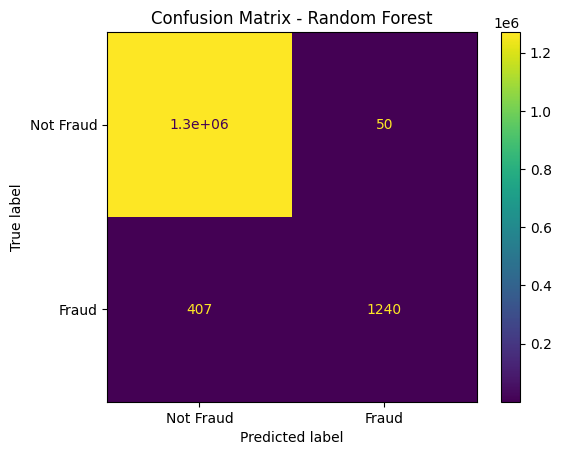

In [73]:
# classification report - RF
classification_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

# confusion matrix - RF
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf.round())
print("Confusion Matrix - Random Forest")
display_labels = ['Not Fraud', 'Fraud']
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

precision_random_forest = precision_score(y_test, y_pred_rf)
recall_random_forest = recall_score(y_test, y_pred_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.79      0.78      0.78      1647

    accuracy                           1.00   1272524
   macro avg       0.89      0.89      0.89   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Decision Tree


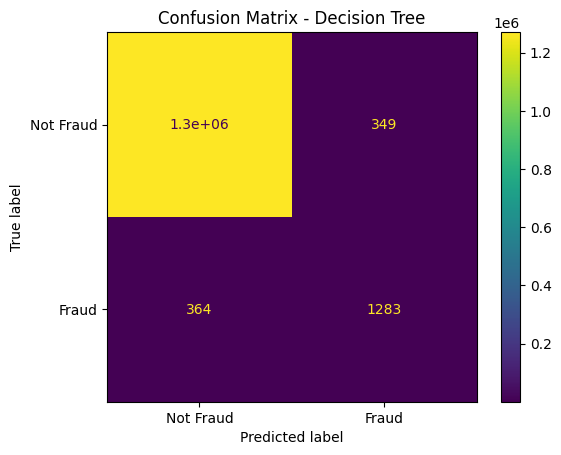

In [74]:
# classification report - DT

classification_report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

# confusion matrix - DT
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()
precision_decision_tree = precision_score(y_test, y_pred_dt)
recall_decision_tree = recall_score(y_test, y_pred_dt)

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270877
           1       0.88      0.38      0.53      1647

    accuracy                           1.00   1272524
   macro avg       0.94      0.69      0.77   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix - Logistic Regression


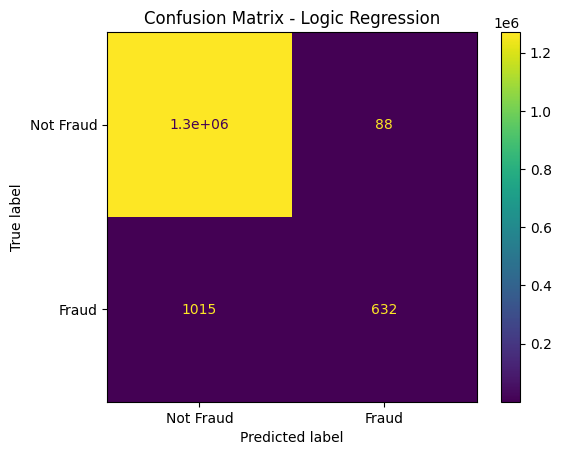

In [75]:
# classification report - LR

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))

# confusion matrix - LR
confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr.round())
print("Confusion Matrix - Logistic Regression")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_lr, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Logic Regression")
plt.show()

precision_logistic_regression = precision_score(y_test, y_pred_lr)
recall_logistic_regression = recall_score(y_test, y_pred_lr)

# Comparing all three models

In [77]:
algorithms = ['Random Forest', 'Decision Tree', 'Logistic Regression']
accuracy_scores = [random_forest_score, decision_tree_score, logistic_regression_score]
precision_scores = [precision_random_forest, precision_decision_tree, precision_logistic_regression]
recall_scores = [recall_random_forest, recall_decision_tree, recall_logistic_regression]

data = {
    'Algorithm': algorithms,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores
}

In [78]:
comparision = pd.DataFrame(data)
comparision

,Algorithm,Accuracy,Precision,Recall
0,Random Forest,0.999637,0.961240,0.752884
1,Decision Tree,0.999637,0.786152,0.778992
2,Logistic Regression,0.999637,0.877778,0.383728


## We got max recall score in Decision tree

## Now we'll try to improve the recall by hyperparameter tuning decision tree

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10, 20, 30, 50, 80],  # explore various depths
    'min_samples_split': [2, 5, 10, 20],  # different min_samples_split
    'min_samples_leaf': [1, 2, 5, 10],  # tuning min_samples_leaf
    'criterion': ['entropy'],  # both gini and entropy criteria
    'class_weight': [None, 'balanced']  # handle imbalance, if applicable
}

dt = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV with the DecisionTree and param_grid
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           scoring='recall',
                           cv=5,
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['entropy'],
                         'max_depth': [10, 20, 30, 50, 80],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='recall', verbose=1)

In [81]:
print("Best parameters found: ", grid_search.best_params_)
print("Best recall score: ", grid_search.best_score_)

Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best recall score:  0.9734989410426816


In [82]:
best_dt = grid_search.best_estimator_
y_pred_dt_tuned = best_dt.predict(X_test)

# Calculate the recall on the test set
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred_dt_tuned)
print("Recall on test data: ", recall)

Recall on test data:  0.9666059502125076


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.96      0.98   1270877
           1       0.03      0.97      0.06      1647

    accuracy                           0.96   1272524
   macro avg       0.51      0.96      0.52   1272524
weighted avg       1.00      0.96      0.98   1272524

Confusion Matrix - Decision Tree tuned


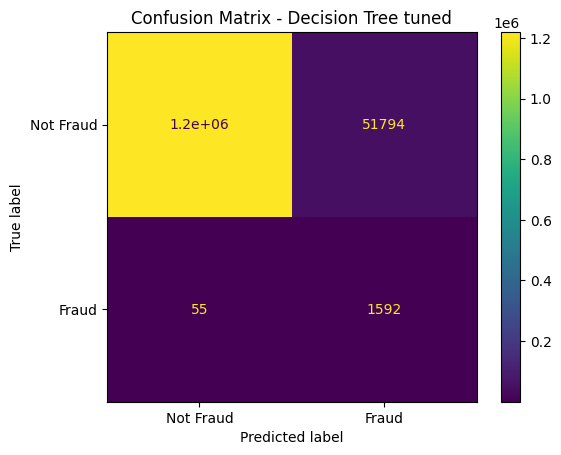

In [83]:
# classification report - Decision tree tuned

print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_dt_tuned))

# confusion matrix - Decision Tree tuned
confusion_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned.round())
print("Confusion Matrix - Decision Tree tuned")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt_tuned, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Decision Tree tuned")
plt.show()

## Case 1
#### * actual = Fraud
#### * predicted Fraud

## Case 2
#### * actual = Not fraud
#### * predicted = Not fraud

## Case 3
#### * actual = Not Fraud
#### * predicted = Fraud

## Case 4
#### * actual = Fraud
#### * predicted = Not fraud

### ----------------------------------------------------------------------------------------------------------------------

#### We can deal with case 3 by rechecking the dataset, but we cannot deal with case 4 where a person did fraud and don't get caught. So to reduce it we need to increase the recall score.

#### So we increased the recall score from `0.77` to `0.96` by hyperparameter tuning the decision tree
#### But due to precision-recall trade-off, the precision went down from `0.78` to `0.03`

# Final model: Hyperparameter tuned decision tree

Confusion Matrix - Decision Tree tuned


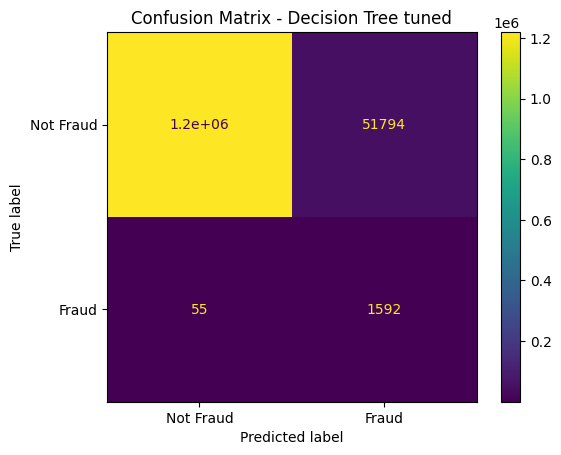

In [85]:
# confusion matrix - Decision Tree tuned
confusion_matrix_dt_tuned = confusion_matrix(y_test, y_pred_dt_tuned.round())
print("Confusion Matrix - Decision Tree tuned")
matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt_tuned, display_labels=display_labels)
matrix.plot()
plt.title("Confusion Matrix - Decision Tree tuned")
plt.show()

In [88]:
print("Final accuracy score: ", accuracy_score(y_test, y_pred_dt_tuned))
print("Best recall score: ", recall_score(y_test, y_pred_dt_tuned))
print("Precision score: ", precision_score(y_test, y_pred_dt_tuned))

Final accuracy score:  0.9592549924402212
Best recall score:  0.9666059502125076
Precision score:  0.02982055220469786


# Final accuracy score:  0.9592
# Best recall score:  0.9666
# Precision score:  0.0298